In [1]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

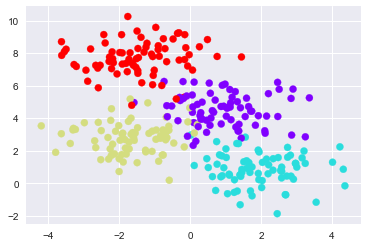

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')

In [3]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

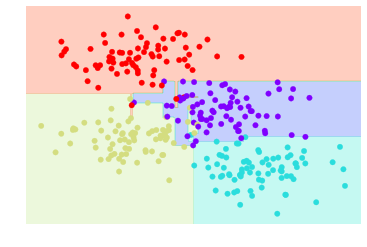

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
visualize_classifier(clf, X, y)

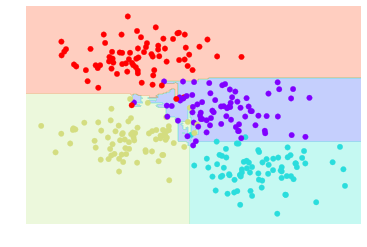

In [5]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=0.8, random_state=1)
visualize_classifier(clf, X, y)

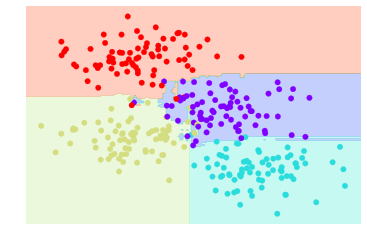

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(clf, X, y)

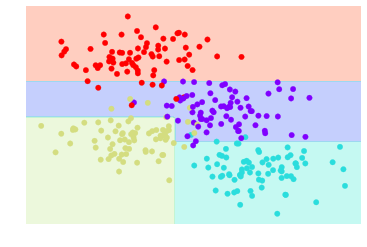

In [7]:
from sklearn.tree import export_graphviz
clf = DecisionTreeClassifier(max_depth=3).fit(X, y)
visualize_classifier(clf, X, y)

In [9]:
with open("dtree.dot", "w") as dotfile:
    export_graphviz(clf, out_file=dotfile, class_names=['a', 'b', 'c', 'd'])
# brew install dot
# dot -Tpdf dtree.dot -o dtree.pdf
